In [1]:
import numpy as np
from scipy import signal,  ndimage, misc
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature

%matplotlib inline
from IPython.display import HTML, display

/tmp/ipykernel_3957/2859365295.py:2: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import signal,  ndimage, misc


<Figure size 640x480 with 0 Axes>

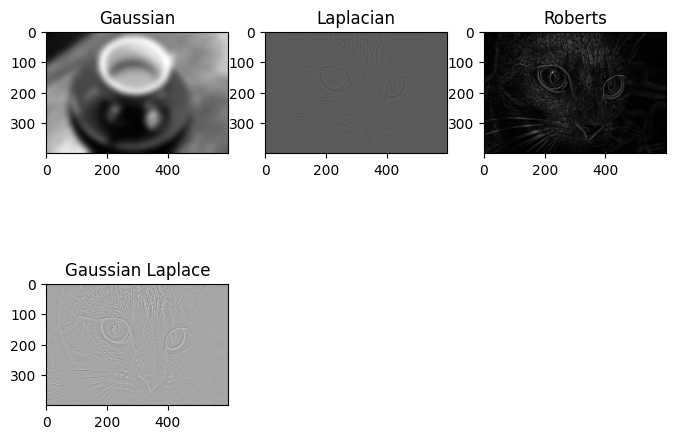

In [11]:
# GAUSSIAN filter on image 1
# LOG ON IMAGE 2

# load two images and turn them gray
img1 = data.coffee() 
img1_gray=img_as_float(color.rgb2gray(img1))
img2 = data.chelsea()
img2_gray=img_as_float(color.rgb2gray(img2))

# NOTICE: the two images must have the same size
# adjust the size of the secont one to match it to the first 
from skimage import transform 
img2_gray = transform.resize(img2_gray, img1_gray.shape)


# Smooth the first image with a Gaussian filter 
#it will become the low resolution one, the one that you see from a distance
sigma=10 # TRY OUT DIFFERENT PARAMETERS!  *gets smoother with higher sigma
img1_smooth = ndimage.gaussian_filter(img1_gray, sigma)

# Smooth the first image with an edge enhancer. the ideal choice would be the LoG filter (second derivatives)
# but you may also try with a first derivatives filter such as Sobel or Roberts (skimage.filters)

k = 3  # Define the size of the Laplacian kernel
img2_smooth = filters.laplace(img2_gray, k)
img2_smooth1 = filters.roberts(img2_gray)
img2_smooth2 = ndimage.gaussian_laplace(img2_gray, sigma=1)

# Visualize the results independently
plt.gray()
plt.figure(figsize=(8,6))
plt.subplot(231)
plt.imshow(img1_smooth, cmap=cm.gist_gray)
plt.title('Gaussian')

 
plt.subplot(232)
plt.imshow(img2_smooth, cmap=cm.gist_gray)
plt.title('Laplacian')

plt.subplot(233)
plt.imshow(img2_smooth1, cmap=cm.gist_gray)
plt.title('Roberts')

plt.subplot(234)
plt.imshow(img2_smooth2, cmap=cm.gist_gray)
plt.title('Gaussian Laplace')

plt.show()




<Figure size 640x480 with 0 Axes>

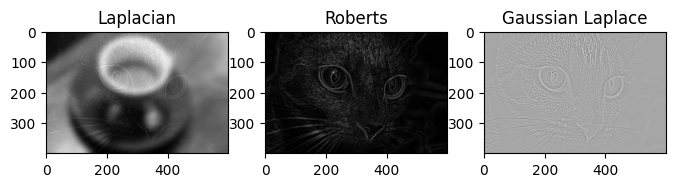

In [3]:
#It's not time to combine the images 
#(a simple sum should do, but you may want to weigh one component more than the other)

img3 = img1_smooth + img2_smooth
img31= img1_smooth + img2_smooth1
img32 = img1_smooth + img2_smooth2

plt.gray()
plt.figure(figsize=(8,6))
 
plt.subplot(131)
plt.imshow(img31, cmap=cm.gist_gray)
plt.title('Laplacian')

plt.subplot(132)
plt.imshow(img2_smooth1, cmap=cm.gist_gray)
plt.title('Roberts')

plt.subplot(133)
plt.imshow(img2_smooth2, cmap=cm.gist_gray)
plt.title('Gaussian Laplace')

plt.show()


<Figure size 640x480 with 0 Axes>

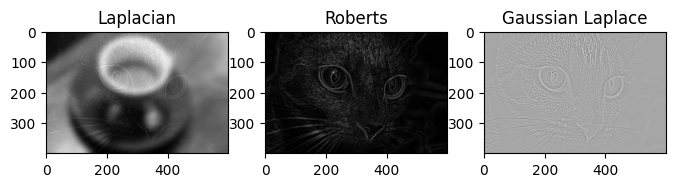

In [4]:
# Normalize the resulting image to ensure pixel values are within [0, 1]
img3 = (img3 - img3.min()) / (img3.max() - img3.min())
img31 = (img31 - img31.min()) / (img31.max() - img31.min())
img32 = (img32 - img32.min()) / (img32.max() - img32.min())

# Display the hybrid image

plt.gray()
plt.figure(figsize=(8,6))
 
plt.subplot(131)
plt.imshow(img31, cmap=cm.gist_gray)
plt.title('Laplacian')

plt.subplot(132)
plt.imshow(img2_smooth1, cmap=cm.gist_gray)
plt.title('Roberts')

plt.subplot(133)
plt.imshow(img2_smooth2, cmap=cm.gist_gray)
plt.title('Gaussian Laplace')

plt.show()

<Figure size 640x480 with 0 Axes>

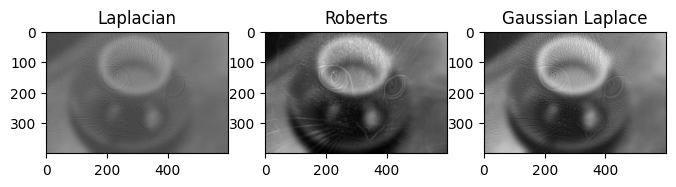

In [5]:
# Define weight factors
weight1 = 0.4
weight2 = 0.8

# Combine the images with weights
img3 = weight1 * img1_smooth + weight2 * img2_smooth
img31 = weight1 * img1_smooth + weight2 * img2_smooth1
img32 = weight1 * img1_smooth + weight2 * img2_smooth2

plt.gray()
plt.figure(figsize=(8,6))

plt.subplot(131)
plt.imshow(img3, cmap=cm.gist_gray)
plt.title('Laplacian')

plt.subplot(132)
plt.imshow(img31, cmap=cm.gist_gray)
plt.title('Roberts')

plt.subplot(133)
plt.imshow(img32, cmap=cm.gist_gray)
plt.title('Gaussian Laplace')

plt.show()


## Doing the process with coolor images this time

Results 

* skimage.filters.roberts() wants a 2D gray scale image.
* color images  have 3 channels and the filters should be applied on all of them


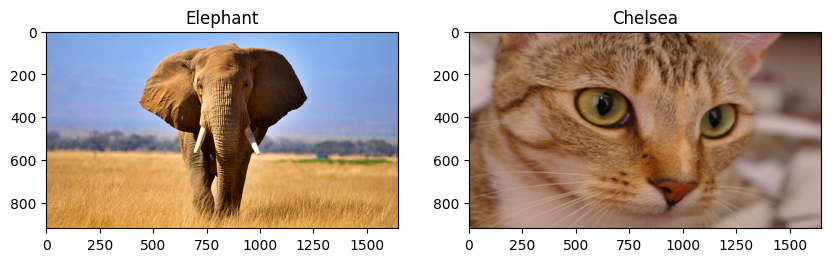

In [27]:
from skimage.io import imread
import os

# Load images
img4 = imread("el2.jpg")  # Elephant image
img5 = data.chelsea()

# Remove the extra dimension from img4
img4 = img4[0]

img5 = transform.resize(img5, img4.shape)

# Show the two images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img4)
plt.title('Elephant')

plt.subplot(122)
plt.imshow(img5)
plt.title('Chelsea')

plt.show()


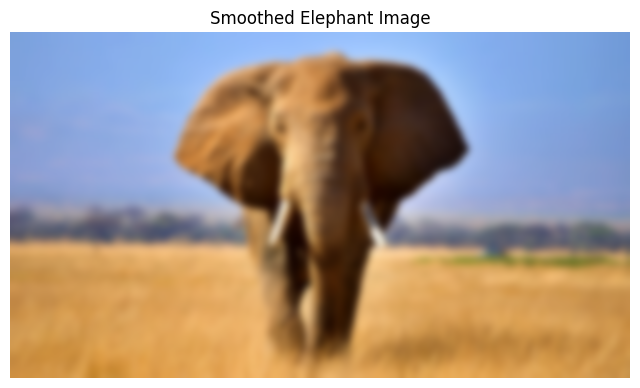

In [28]:
# Apply Gaussian filter to each color channel separately
img4_smooth = np.zeros_like(img4, dtype=np.float64)
for i in range(3):
    img4_smooth[:, :, i] = ndimage.gaussian_filter(img4[:, :, i], sigma)

# Normalize the smoothed image to ensure pixel values are within [0, 1]
img4_smooth = (img4_smooth - img4_smooth.min()) / (img4_smooth.max() - img4_smooth.min())

# Display the smoothed image
plt.figure(figsize=(8, 6))
plt.imshow(img4_smooth)
plt.title('Smoothed Elephant Image')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.33796768047658005..0.4725991462435386].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.33796768047658005..0.4725991462435386].


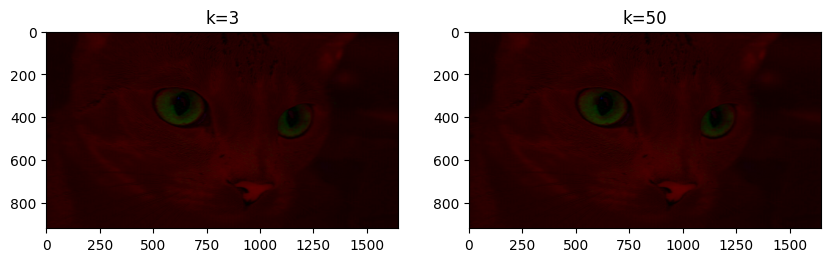

In [29]:
k = 3
img5_smooth = filters.laplace(img5, k)

k = 50
img51_smooth = filters.laplace(img5, k)

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.imshow(img5_smooth)
plt.title('k=3')

plt.subplot(122)
plt.imshow(img51_smooth)
plt.title('k=50')

plt.show()

The kernel size determines the concidering area of the image for the laplacian.
It gets higher, will result in less details and smoother edges.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3340151113066196..1.2806622770707305].


Text(0.5, 1.0, 'Hybrid Image')

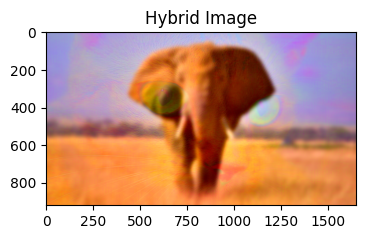

In [31]:
img6 = img4_smooth + img5_smooth 

plt.figure(figsize=(4,6))

plt.imshow(img6)
plt.title('Hybrid Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23539160558261787..0.5344082579811319].


Text(0.5, 1.0, 'Hybrid Image')

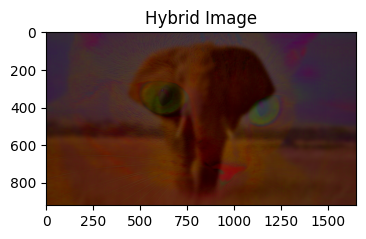

In [35]:
weight1 = 0.3
weight2 = 0.7

img7 = weight1 * img4_smooth + weight2 * img5_smooth


plt.figure(figsize=(4,6))
plt.imshow(img7)
plt.title('Hybrid Image')

## Let's make a perfect hybrid image.

while laplaciann enhance the edges and sharp transitinos and is able to introduce noises by calculating differences in intensity and highlighting high frequency components, the image-gaussianblur(image) function, removes the low frequency content by subtrackting the smoothed veersion from the original one. They are not exactly the same, but are doing the extracting high frequency details.

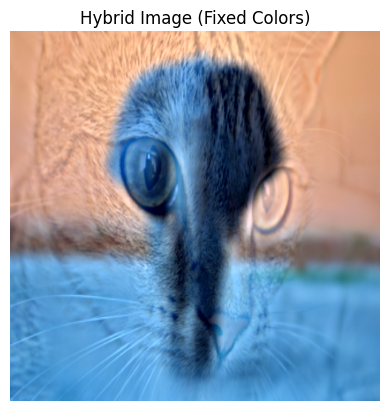

In [43]:
import cv2

image1 = img4  
image2 = data.chelsea()

# Convert OpenCV image from BGR to RGB if necessary
if image1.shape[-1] == 3:  # Check if it has 3 channels
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Resize both images to the same size
image1 = cv2.resize(image1, (500, 500))
image2 = cv2.resize(image2, (500, 500))

# Convert to float32 for processing
image1 = np.float32(image1) / 255.0
image2 = np.float32(image2) / 255.0

# Apply Gaussian blur separately for each channel (to preserve colors)
low_frequencies = np.zeros_like(image1)
high_frequencies = np.zeros_like(image2)

for i in range(3):  # Process each color channel separately
    low_frequencies[:, :, i] = cv2.GaussianBlur(image1[:, :, i], (21, 21), 10)
    high_frequencies[:, :, i] = image2[:, :, i] - cv2.GaussianBlur(image2[:, :, i], (21, 21), 10)

# Combine images without distorting colors
hybrid_image = low_frequencies + high_frequencies

# Clip values to the valid range [0,1]
hybrid_image = np.clip(hybrid_image, 0, 1)

# Convert back to uint8 for display
hybrid_image = (hybrid_image * 255).astype(np.uint8)

# Display the final corrected hybrid image
plt.imshow(hybrid_image)
plt.title("Hybrid Image (Fixed Colors)")
plt.axis("off")
plt.show()


As a comprehensive note on making hybrid image from color images vs gray scale:

1. Color image mismatch(RGB vs BGR)
    Will result in color shift.
        applying the filters without separatig channels, the wrong color intensities mix. 

2. Uneven color frequency response
    Since the colors do not contribute equally to the image sharpness, if we apply the same guassian or high pass filter to all channels, some colors will be more blurred than others.
        Applying the filters saperately per channels will help.
        Convert to YCbCr(luminance and chrominance space) and filter only the luminance channel.

3. overPowering High frecuency details
        normalize each channel before combining.

4. Perceptual differences in color vision
        use different blur intensity per channel.
        convert to YUL or LAB color space, and filter  L not RGB.

5. Clipping and overflow issues 
    Gussian smoothes the intensities and redusing the contrast.
    high pass enhances small differences resulting in amplifying noise.
        Clipping and normalizig will help.

NOTE:     The human eye is more sensitive to brigthness than color.

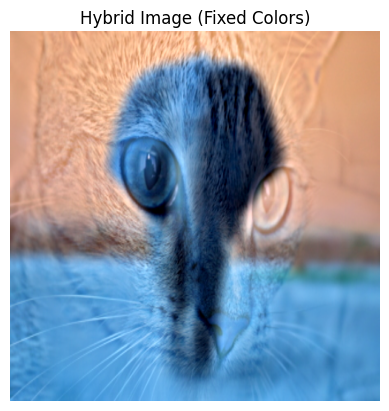

In [48]:
image1 = img4  
image2 = data.chelsea()

# Convert OpenCV image from BGR to RGB if necessary
if image1.shape[-1] == 3:  # Check if it has 3 channels
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if image2.shape[-1] == 3:  
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Resize both images to the same size
image1 = cv2.resize(image1, (500, 500))
image2 = cv2.resize(image2, (500, 500))

# Convert to float32 for processing
image1 = np.float32(image1) / 255.0
image2 = np.float32(image2) / 255.0

# Apply Gaussian blur separately for each channel (to preserve colors)
low_frequencies = np.zeros_like(image1)
high_frequencies = np.zeros_like(image2)

for i in range(3):  # Process each color channel separately
    low_frequencies[:, :, i] = cv2.GaussianBlur(image1[:, :, i], (21, 21), 10)
    high_frequencies[:, :, i] = image2[:, :, i] - cv2.GaussianBlur(image2[:, :, i], (21, 21), 10)

# Combine images without distorting colors
hybrid_image = low_frequencies + high_frequencies

# Clip values to the valid range [0,1]
hybrid_image = np.clip(hybrid_image, 0, 1)

# Convert back to uint8 for display
hybrid_image = (hybrid_image * 255).astype(np.uint8)

plt.imshow(hybrid_image)
plt.title("Hybrid Image (Fixed Colors)")
plt.axis("off")
plt.show()


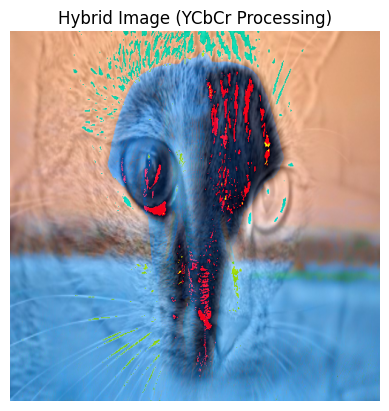

In [49]:
image1 = img4  
image2 = data.chelsea()

if image1.shape[-1] == 3:  # Check if it has 3 channels
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if image2.shape[-1] == 3:  
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Resize both images to the same size
image1 = cv2.resize(image1, (500, 500))
image2 = cv2.resize(image2, (500, 500))

# Convert to float32 for processing
image1 = np.float32(image1) / 255.0
image2 = np.float32(image2) / 255.0

# Convert both images to YCbCr color space
image1_YCbCr = cv2.cvtColor(image1, cv2.COLOR_RGB2YCrCb)
image2_YCbCr = cv2.cvtColor(image2, cv2.COLOR_RGB2YCrCb)

# Extract Y (luminance) channel for processing
Y_low_freq = cv2.GaussianBlur(image1_YCbCr[:, :, 0], (21, 21), 10)  # Apply Gaussian Blur to the Y channel
Y_high_freq = image2_YCbCr[:, :, 0] - cv2.GaussianBlur(image2_YCbCr[:, :, 0], (21, 21), 10)  # Extract high-frequencies

# Combine the filtered Y channel
Y_hybrid = Y_low_freq + Y_high_freq

# Clip values to prevent overflow
Y_hybrid = np.clip(Y_hybrid, 0, 1)

# Merge with original CbCr channels to retain color
hybrid_YCbCr = np.zeros_like(image1_YCbCr)
hybrid_YCbCr[:, :, 0] = Y_hybrid  # Assign the hybrid Y channel
hybrid_YCbCr[:, :, 1:] = image1_YCbCr[:, :, 1:]  # Keep original color channels (Cb, Cr)

# Convert back to RGB for display
hybrid_image = cv2.cvtColor(hybrid_YCbCr, cv2.COLOR_YCrCb2RGB)

hybrid_image = (hybrid_image * 255).astype(np.uint8)

plt.imshow(hybrid_image)
plt.title("Hybrid Image (YCbCr Processing)")
plt.axis("off")
plt.show()
